In [246]:
# Import libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
sns.set()

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from scipy import stats

import warnings

In [247]:
import requests, zipfile, io
r = requests.get("https://github.com/alvin-98/Santander-Customer-Satisfaction/blob/main/santander-customer-satisfaction.zip?raw=true")

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [248]:
#reading train and test data into respective dataframes
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [249]:
cols_1 = [] #can be deleted
cols_2 = [] #categorical vars
cols_3 = [] #categorical vars
for col in df_train.columns:
  n = df_train[col].nunique()
  if n < 10:
    # print(col, n)
    if n == 1:
      cols_1.append(col)
    elif n == 2:
      cols_2.append(col)
    elif n == 3:
      cols_3.append(col)

In [250]:
for i in range(len(cols_3)):
  print(cols_3[i],df_train[cols_3[i]].unique())

num_var1_0 [0 3 6]
num_var1 [0 3 6]
num_var8_0 [0 3 6]
num_var13_corto_0 [0 3 6]
num_var13_corto [0 3 6]
num_var24 [0 3 6]
num_var33 [0 3 6]
num_var40_0 [0 3 6]
num_var44_0 [0 3 6]
saldo_var6 [    0.  11976.6 19531.8]
saldo_var13_medio [    0 30000  9000]
saldo_var18 [      0 3000000  300000]
saldo_var29 [    0.  11976.6 19531.8]
saldo_var34 [    0 36000 15000]
delta_imp_reemb_var17_1y3 [         0 9999999999         -1]
delta_imp_trasp_var17_in_1y3 [         0 9999999999         -1]
delta_imp_trasp_var33_in_1y3 [         0 9999999999         -1]
delta_num_reemb_var17_1y3 [         0 9999999999         -1]
delta_num_trasp_var17_in_1y3 [         0 9999999999         -1]
delta_num_trasp_var33_in_1y3 [         0 9999999999         -1]
imp_amort_var18_ult1 [    0.   15691.8   1883.22]
imp_amort_var34_ult1 [   0.   1096.02  276.24]
imp_trasp_var17_in_hace3 [    0.   96781.44 45741.48]
num_aport_var33_ult1 [0 6 3]
num_meses_var29_ult3 [0 1 2]
num_trasp_var17_in_hace3 [0 6 3]
num_trasp_var33_

In [251]:
df_T = df_train.T
df_T = pd.DataFrame(df_T)
duplicated_predictors = df_T.duplicated()
duplicated_predictors = list(df_train.columns[list(duplicated_predictors)])
print('duplicated_predictors', duplicated_predictors)
print("Number of predictors with duplicacy is", len(duplicated_predictors))

duplicated_predictors ['ind_var2', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var41', 'ind_var39', 'ind_var46_0', 'ind_var46', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29_0', 'num_var29', 'num_var32', 'num_var34', 'num_var37', 'num_var41', 'num_var39', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var29', 'saldo_var41', 'saldo_var46', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reem

In [252]:
cor_threshold = 0.95
matrix = df_train.corr().abs()

selected = matrix.where(np.triu(np.ones(matrix.shape),k=1).astype(np.bool))
correlated_predictors = [i for i in selected.columns if any(selected[i] >= cor_threshold)]

print("Number of predictors based on correlation is", len(correlated_predictors))

Number of predictors based on correlation is 130


In [253]:
# pval_threshold = 0.0001
# pval_predictors = []

# for col in df_train.columns:
#     pval = list(stats.ttest_ind(df_train[col], df_train['TARGET'], equal_var=False))[1]
#     if pval >= pval_threshold:
#         pval_predictors.append(col)
        
# print("Number of predictors based on pval is", len(pval_predictors))

In [254]:
to_be_dropped = [
    "ID", #it is an unique value for every entry in the data
]
response = 'TARGET'

to_be_dropped = to_be_dropped + duplicated_predictors + correlated_predictors + cols_1

final_drop = []

for col in to_be_dropped:
    if (col not in final_drop) and (col != response):
        final_drop.append(col)

In [255]:
len(final_drop)

165

In [256]:
def dropping_cols(df, cols=final_drop):
    df = df.drop(cols, axis=1)
    return df

df_train = dropping_cols(df_train)
df_test = dropping_cols(df_test)

In [257]:
# ##lets try to up and down sample the data
# from sklearn.utils import resample

# df_train_1 = df_train[df_train['TARGET']==1]
# df_train_0 = df_train[df_train['TARGET']==0]

# n_samples = 4000

# df_train_1_upsampled = resample(df_train_1, replace=True, n_samples=n_samples)
# df_train_0_downsampled = resample(df_train_0, replace=False, n_samples=n_samples)

# df_train_up_down_sampled = pd.concat([df_train_0_downsampled, df_train_1_upsampled])

In [258]:
# #separting predictors and response variables
# x_train_og = df_train_up_down_sampled.drop('TARGET', axis=1)
# y_train_og = df_train_up_down_sampled['TARGET']

# x_train, x_val ,y_train, y_val = train_test_split(x_train_og, y_train_og , test_size=0.2,random_state=10)

In [259]:
method = SMOTE(sampling_strategy="minority")

x_train = df_train.drop('TARGET', axis=1)
y_train = df_train['TARGET']

x_train, y_train = method.fit_resample(x_train, y_train)

In [260]:
#separting predictors and response variables
# x_train_og = df_train.drop('TARGET', axis=1)
# y_train_og = df_train['TARGET']

x_train, x_val ,y_train, y_val = train_test_split(x_train, y_train , test_size=0.2,random_state=10)

In [261]:
scaler = MinMaxScaler()
scaler.fit_transform(x_train)
scaler.fit_transform(x_val)

scaler.fit_transform(df_test)

array([[0.99976406, 0.27      , 0.        , ..., 0.        , 0.        ,
        0.0013612 ],
       [0.99976406, 0.3       , 0.        , ..., 0.        , 0.        ,
        0.00153268],
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00158484],
       ...,
       [0.99976406, 0.19      , 0.        , ..., 0.        , 0.        ,
        0.00574866],
       [0.99976406, 0.35      , 0.        , ..., 0.        , 0.        ,
        0.00401853],
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00401853]])

In [262]:
#df_train.info(verbose=True, show_counts=True)
#there are no null values in the dataset and all columns are either of int or float datatype

In [263]:
#the data is highly imbalanced with the dominant class being class 0 (customer satisfied)
##this means that the accuracy of the model is not a good estimate of model performance
print('1:',len(y_train[y_train==1]),'0:',len(y_train[y_train==0]))

1: 58299 0: 58520


In [264]:
# y_true = pd.read_csv('submission.csv')
# y_true = y_true['TARGET']
# y_new_true = (y_true>0.5)*1

In [265]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=5)
random_forest.fit(x_train,y_train)
feat_imp = random_forest.feature_importances_
feat_names = x_train.columns
feat_imp_dict = dict(zip(feat_names,feat_imp))
feat_imp_dict = {k: v for k, v in sorted(feat_imp_dict.items(), key=lambda item: item[1], reverse=True)}
ind = 20
top_vals = [el for i,el in enumerate(feat_imp_dict.values()) if i<ind]
top_cols = [el for i,el in enumerate(feat_imp_dict.keys()) if i<ind]

x_train = x_train[top_cols]
x_val = x_val[top_cols]

In [266]:
#building a logistic regression model with all predictors
logreg = LogisticRegression(max_iter = 20000, C = 100000)

logreg.fit(x_train, y_train)
cval = cross_validate(logreg, x_train, y_train, scoring='accuracy', cv=10)
print(np.mean(cval['test_score']))

0.7507683772937793


In [267]:
def roc(model, predictor, response):
  y_pred_proba = model.predict_proba(predictor)
  y_pred = model.predict(predictor)
  fpr, tpr, threshold = roc_curve(response, y_pred_proba[:,1])
  plt.plot(fpr, tpr)
  plt.plot([0,1], [0,1])
  print('accuracy score:',accuracy_score(response, y_pred))
  print('roc_auc_score',roc_auc_score(response, y_pred_proba[:,1]))
  plt.show()

accuracy score: 0.7651771956856702
roc_auc_score 0.848678974540551


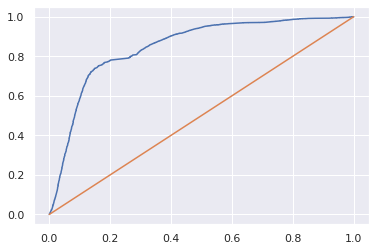

In [268]:
roc(logreg, x_val, y_val)

In [269]:
depths = np.linspace(2, 12, 11)
cv_list = []
for d in depths:
  dt = DecisionTreeClassifier(max_depth=d)
  cval = cross_validate(dt, x_train, y_train, scoring='accuracy', cv=10)
  cv_list.append(np.mean(cval['test_score']))


In [270]:
best_d = depths[cv_list.index(max(cv_list))]

accuracy score: 0.8876562232494436
roc_auc_score 0.953780676252611


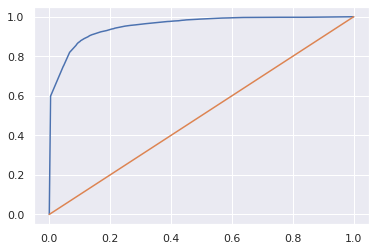

In [271]:
best_dt = DecisionTreeClassifier(max_depth=best_d)
best_dt.fit(x_train, y_train)
roc(best_dt, x_val, y_val)

In [272]:
klist = np.linspace(2,24,23)
cv_list = []
for k in klist:
  knn = KNeighborsClassifier(n_neighbors = k)
  cval = cross_validate(dt, x_train, y_train, scoring='accuracy', cv=10)
  cv_list.append(np.mean(cval['test_score']))

In [273]:
best_k = klist[cv_list.index(max(cv_list))]
best_k

24.0

accuracy score: 0.838828967642527
roc_auc_score 0.9149956930092317


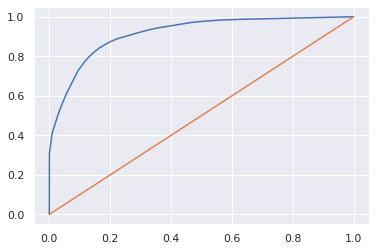

In [274]:
best_knn = KNeighborsClassifier(n_neighbors = int(best_k))
best_knn.fit(x_train, y_train)
roc(best_knn, x_val, y_val)

accuracy score: 0.9000171203561034
roc_auc_score 0.9634245291908581


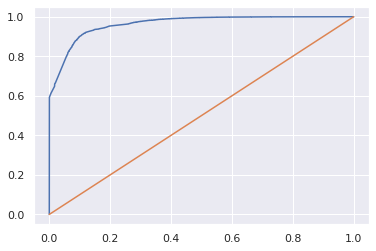

In [275]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(best_dt, random_state=10, n_estimators=50, bootstrap_features=True)
bg.fit(x_train, y_train)
roc(bg, x_val, y_val)

accuracy score: 0.9173771614449581
roc_auc_score 0.9732186582775914


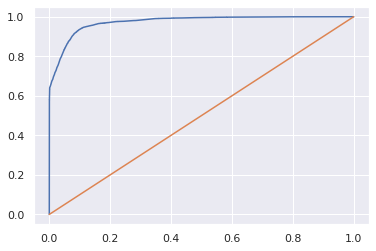

In [276]:
from sklearn.ensemble import RandomForestClassifier

depths = np.linspace(2, 24, 23)
cv_list = []
for d in depths:
  rf = RandomForestClassifier(max_depth=d, random_state=10)
  cval = cross_validate(rf, x_train, y_train, scoring='accuracy', cv=10)
  cv_list.append(np.mean(cval['test_score']))

best_d = depths[cv_list.index(max(cv_list))]

rf = RandomForestClassifier(max_depth=best_d, random_state=10)
rf.fit(x_train, y_train)
roc(rf, x_val, y_val)

accuracy score: 0.9010785824345147
roc_auc_score 0.9651330468722197


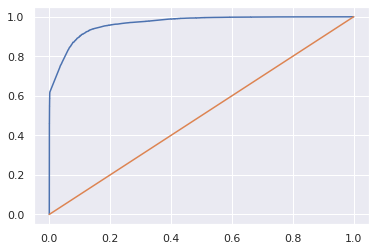

In [278]:
from sklearn.ensemble import GradientBoostingClassifier

depths = np.linspace(2, 12, 11)
cv_list = []
for d in depths:
  gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=d, random_state=10)
  cval = cross_validate(gb, x_train, y_train, scoring='accuracy', cv=10)
  cv_list.append(np.mean(cval['test_score']))

best_d = depths[cv_list.index(max(cv_list))]

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=best_d, random_state=10)

gb.fit(x_train, y_train)

roc(gb, x_val, y_val)